# Instalación de paquetes

En primer lugar instalamos los paquetes que vamos a utilizar, en este caso:
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Scikit-learn

mediante el comando `!pip install [nombre_paquete]`

In [1]:
! pip install pandas
! pip install seaborn
! pip install numpy
! pip install matplotlib
! pip install scikit-learn==1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 60.9 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


# Importación de paquetes

Seguidamente los importamos con `import [nombre_paquete] as [alias]`

En el caso de scikit-learn solo utilizaremos una función de esta librería por ende nos limitamos a importar solo esta



In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/tmp/ipykernel_2304/3521790389.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Cargamos el dataset

Seguidamente cargaremos el dataset y comprobaremos que se haya cargado bien mostrando un ejemplo de las 5 primeras filas del mismo.

In [4]:
#cargamos el dataset
df = sns.load_dataset("tips")
#comprobamos mostrando las 5 primeras filas
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Exploramos el dataset

En este apartado comprobaremos el tamaño del dataset, el contenido de sus columnas, sus estadísticas básicas y si contiene nulos.

## Tamaño del dataset

Para ello usaremos el método de pandas info() que nos mostrará tanto las columnas como su tipo y el conteo de tuplas.

También nos mostrará si contiene valores nulos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Podemos observar que:
* Contamos con 7 columnas, de las cuales nuestra columna a predecir será TIP.
* Contamos con 244 entradas
* No contiene nulos

## Valores Nulos
utilizando el método .isnull() de panda y vemos que efectivamente no contiene nulos.

In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
# si los hubiese utilizaríamos 
from sklearn.impute import SimpleImputer

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

imputer_num = SimpleImputer(strategy='median') # para valores numéricos
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

imputer_cat = SimpleImputer(strategy='most_frequent') # para valores de texto 
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Preprocesamiento
Utilizamos el método de pandas get_dummies para pasar las columnas de texto a número y generamos un nuevo dataframe donde volcar esta información para no alterar el df original

In [8]:

dfDummies = pd.get_dummies(df, columns=["sex", "smoker", "time"], drop_first=True) ## CAMBIAR
dfDummies = pd.get_dummies(dfDummies, columns=["day"])

dfDummies['sex_Male']= dfDummies['sex_Male'].astype('int64')
dfDummies['smoker_Yes']= dfDummies['smoker_Yes'].astype('int64')
dfDummies['time_Lunch']= dfDummies['time_Lunch'].astype('int64')
dfDummies['day_Fri']= dfDummies['day_Fri'].astype('int64')
dfDummies['day_Sat']= dfDummies['day_Sat'].astype('int64')
dfDummies['day_Sun']= dfDummies['day_Sun'].astype('int64')
dfDummies['day_Thur']= dfDummies['day_Thur'].astype('int64')


dfDummies.head()

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2.0,0,0,0,0,0,1,0
1,10.34,1.66,3.0,1,0,0,0,0,1,0
2,21.01,3.50,3.0,1,0,0,0,0,1,0
3,23.68,3.31,2.0,1,0,0,0,0,1,0
4,24.59,3.61,4.0,0,0,0,0,0,1,0


Generamos un histograma (esta vez utilizando el DF nuevo) para explorar los datos de nuestro DataFrame

/tmp/ipykernel_2304/1374432431.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfDummies.hist(ax = ax) #que esta figura lo haga para mi conjunto de datos df, que cree un histograma, que lo formatee al tamaño anterior


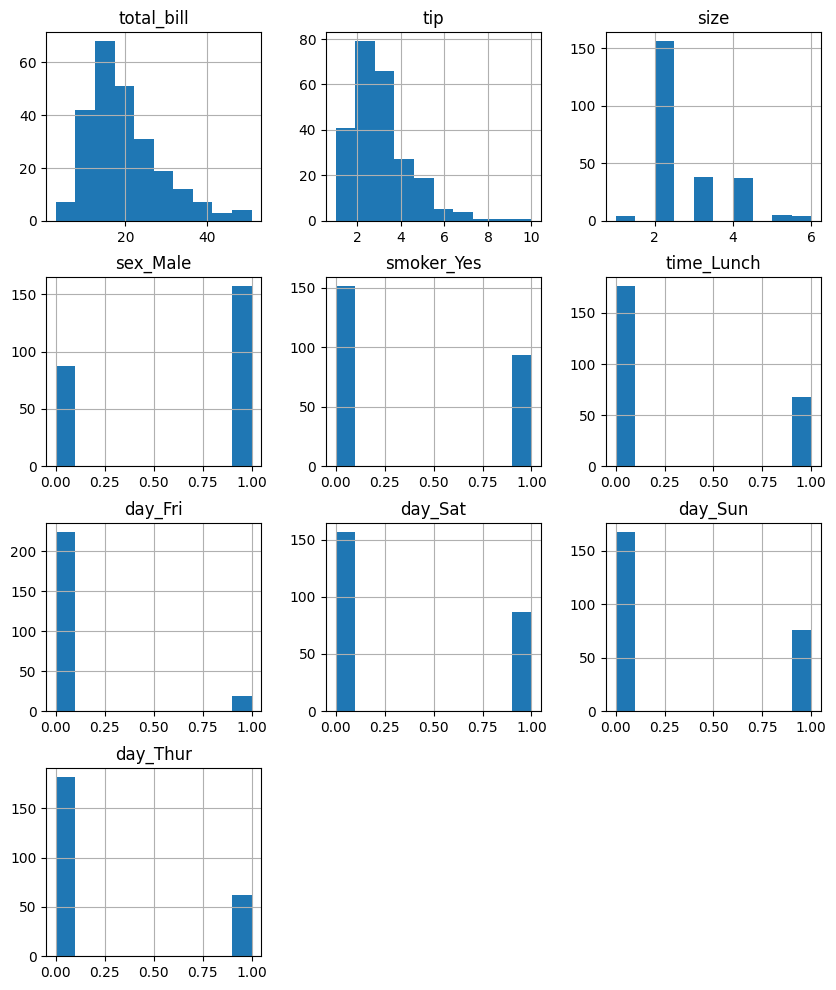

In [9]:
fig = plt.figure(figsize = (10,12))
ax = fig.gca() #para agrandar la figura
dfDummies.hist(ax = ax) #que esta figura lo haga para mi conjunto de datos df, que cree un histograma, que lo formatee al tamaño anterior
plt.show() # para que no nos salga la metadata

Podemos ver la separación de los días usando el dataset sin corregir


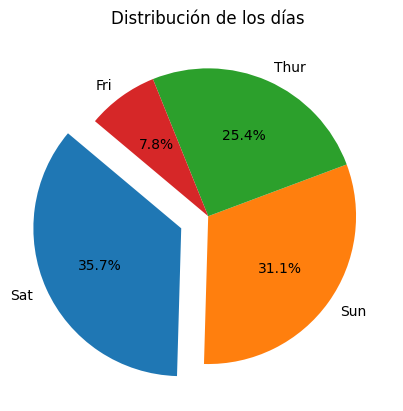

In [10]:
day_counts = df['day'].value_counts()

# Crear el gráfico de tarta
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140,explode=[0.2,0,0,0])
plt.title('Distribución de los días')
plt.show()

Seguidamente generamos un heatmap para ver qué columnas tienen más peso sobre la columna a predecir (tips)

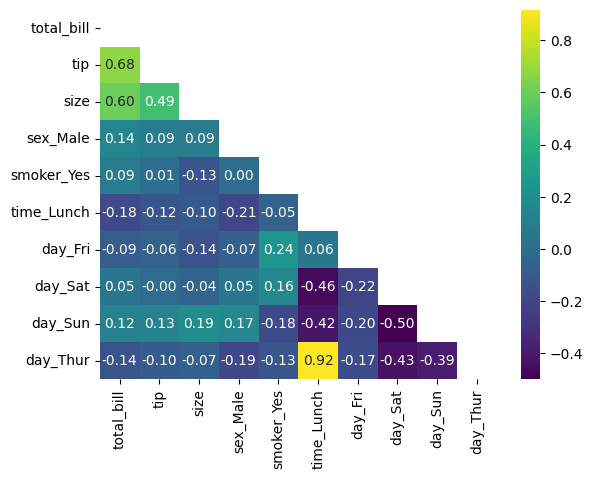

In [11]:
# Calcula la correlación y crea el heatmap
correlation_matrix = dfDummies.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Genera una matriz de True con el triángulo superior
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", mask=mask)
# Muestra el gráfico
plt.show()

Vemos que las que tienen más relación son size, day_Sun, time_Lunch

Por lo cual deducimos que:
* tendrán mas propinas cuanto más grande sea la mesa (cuantos más sean a comer/cenar)
* tendrán más propinas si es a la hroa de Cenar
* El día que tendrán más propinas será "Sunday" (Domingo) y elq ue menos "Thursday" (Jueves)


Podemos también explorar con un scatterplot para las columnas total_bill con tip y diferenciar entre si es hombre o mujer 

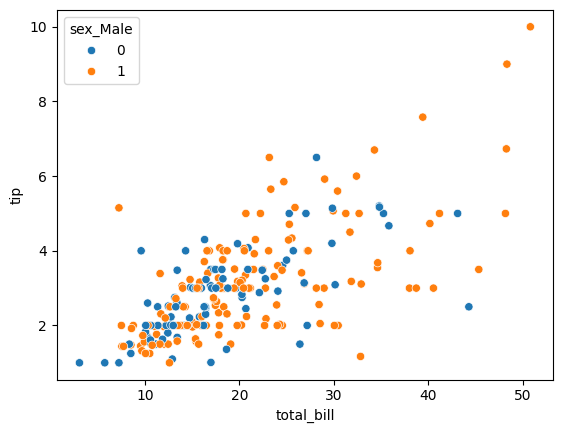

In [12]:
sns.scatterplot(x='total_bill',y='tip',data=dfDummies,hue='sex_Male')
plt.show()

Podemos hacer lo mismo con los días de la semana 

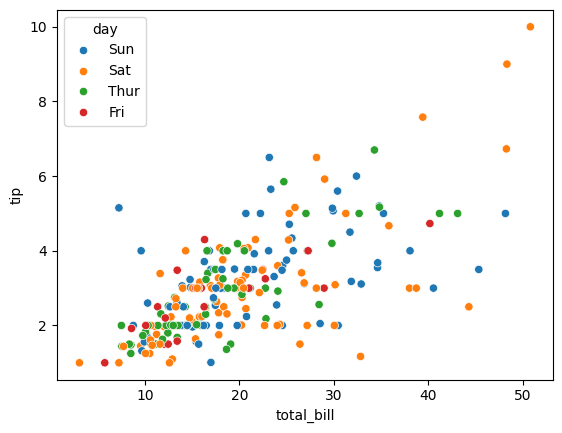

In [13]:
sns.scatterplot(x='total_bill',y='tip',data=df,hue='day')
plt.show()